In [40]:
from duckduckgo_search import ddg_images
from fastcore.all import *
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [57]:
!pip install -Uqq fastai duckduckgo_search

In [58]:
!pip install -Uqq fastbook
import fastbook 
fastbook.setup_book()

In [59]:
from fastbook import *
from fastai.vision.widgets import *
from fastai import *

In [68]:
ims = search_images_ddg('bird')
len(ims)
ims[0]

'https://petable.care/wp-content/uploads/2018/09/pexels-photo-927500-1.jpeg'

In [71]:
ims = ['http://petable.care/wp-content/uploads/2018/09/pexels-photo-927500-1.jpeg']
#not https

In [73]:
dest = 'images/birdo.jpg'
download_url(ims[0], dest)

Path('images/birdo.jpg')

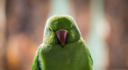

In [74]:
im = Image.open(dest)
im.to_thumb(128,128)

In [81]:
animal_types = 'bird','mammal','fish'
path = Path('animals')

In [87]:
if not path.exists():
    path.mkdir()
    for o in animal_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        download_images(dest, urls=search_images(f'{o} fhoto'))
        resize_images(path/o, max_size=400, dest=path/o)

start
start
start1
start2
start3
Searching for 'bird fhoto'
start1
start2
start3
Searching for 'mammal fhoto'
start1
start2
start3
Searching for 'fish fhoto'


In [89]:
fns = get_image_files(path)
fns

(#87) [Path('animals/bird/04bd627f-c3cc-4220-8a9c-b30b07a90ac7.jpg'),Path('animals/bird/054f0ee2-0035-4126-abb6-37ea94beab5c.jpg'),Path('animals/bird/097b5053-1d7c-4ceb-9ffe-96b5c572a94f.jpg'),Path('animals/bird/12f6d206-5d35-4552-9c97-e9b851ad58dd.jpg'),Path('animals/bird/1a15a4f4-4487-4a62-9ddf-65232f64af2b.jpg'),Path('animals/bird/2388e4d5-6bd5-4fef-aaf7-b62c7e903b82.jpg'),Path('animals/bird/3debe6ba-4e3f-4bfe-9cee-4c988055f6ba.jpg'),Path('animals/bird/3f226d7d-dcd8-4379-b819-75d46ac71a46.jpg'),Path('animals/bird/4697c9a7-4164-4581-bfff-a42c347d3f05.jpg'),Path('animals/bird/55d17b39-86bc-4806-805a-a5930cc7fdfb.jpg')...]

In [90]:
failed = verify_images(fns)
failed
len(failed)

1

In [91]:
failed.map(Path.unlink);

In [101]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [102]:
dls = bears.dataloaders(path)

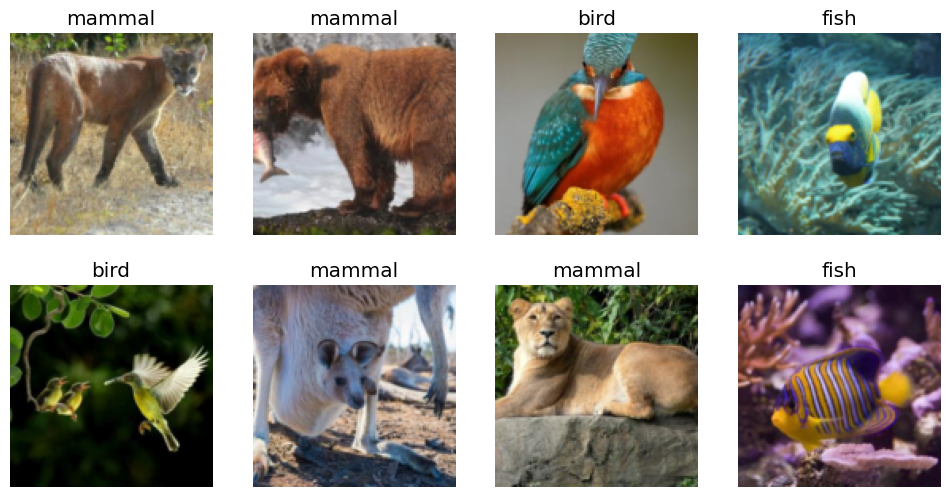

In [103]:
dls.valid.show_batch(max_n=8, nrows=2)

In [107]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

C:\Users\admin\PycharmProjects\pythonProject\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\admin\PycharmProjects\pythonProject\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.530883,3.043485,0.764706,00:01


epoch,train_loss,valid_loss,error_rate,time
0,2.246518,2.201838,0.647059,00:02
1,1.867410,1.118186,0.411765,00:02
2,1.600870,0.611062,0.294118,00:02
3,1.300934,0.346691,0.117647,00:02
4,1.078574,0.232222,0.058824,00:02


In [108]:
learn.export('model.pkl')

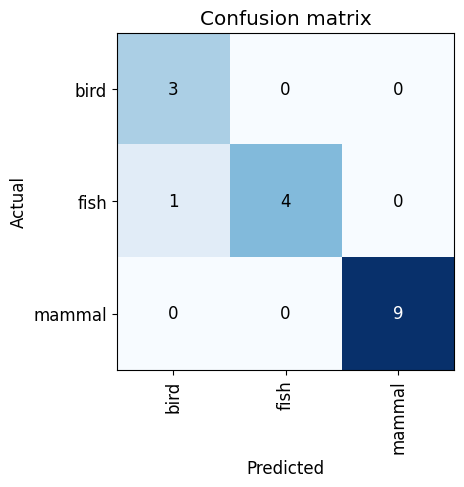

In [109]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

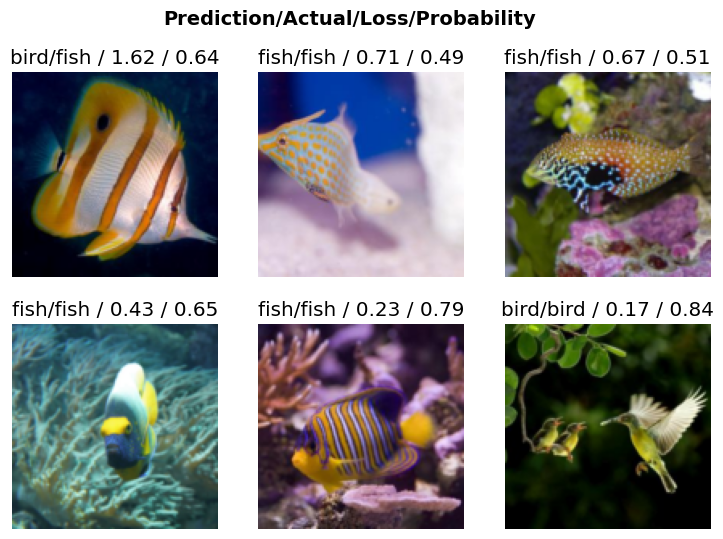

In [110]:
interp.plot_top_losses(6, nrows=2)

In [111]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [112]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()


In [114]:
#!pip install -Uqq fastai
from fastai.vision.all import *
#!pip install gradio
import gradio as gr

In [120]:
categories = ('bird','fish','mammal')
def imgclass(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [121]:
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['animals/bird/12.jpg','animals/mammal/12.jpg','animals/fish/12.jpg']
intfs = gr.Interface(fn=imgclass, inputs=image, outputs=label, examples=examples)
intfs.launch(inline=False)

C:\Users\admin\PycharmProjects\pythonProject\venv\lib\site-packages\gradio\inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\admin\PycharmProjects\pythonProject\venv\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\admin\PycharmProjects\pythonProject\venv\lib\site-packages\gradio\outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\admin\PycharmProjects\pythonProject\venv\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.
